<a href="https://colab.research.google.com/github/anam140/ApprentiseApplication/blob/master/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Access the content from Google drive 

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import required Libraries 

In [42]:
import pandas as pd
import numpy as np
import seaborn as sb
import math
import matplotlib.pyplot as plt
%matplotlib inline

Importing Data from Drive CSV Folder

In [43]:
mydata = pd.read_csv('/content/drive/MyDrive/CSV/suv_data.csv')
print(mydata.shape)
mydata.head(6)

(400, 5)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0


Analyzing the Data

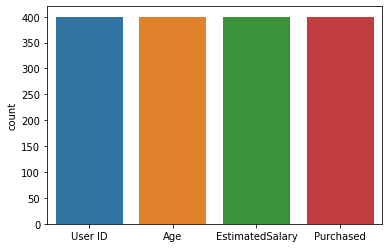

In [44]:
sb.countplot(data = mydata)

Checking the number of purchased[1] & not purchased[0] by using CountPlot Graph

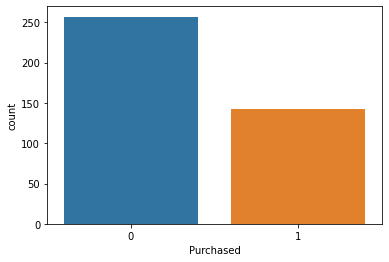

In [45]:
sb.countplot(x='Purchased',data = mydata)

Purchase count based on Age

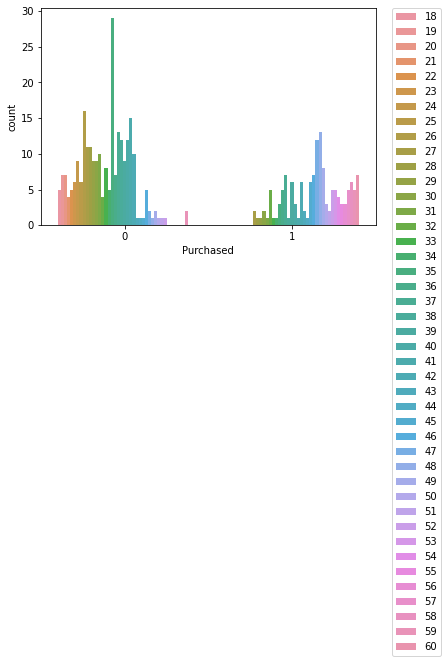

In [46]:
sb.countplot(x='Purchased',hue='Age',data = mydata)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# 

Purchange count based on Gender 

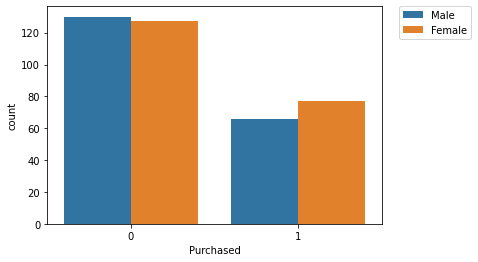

In [47]:
sb.countplot(x='Purchased',hue='Gender',data = mydata)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Purchase count based on Estimated Salary

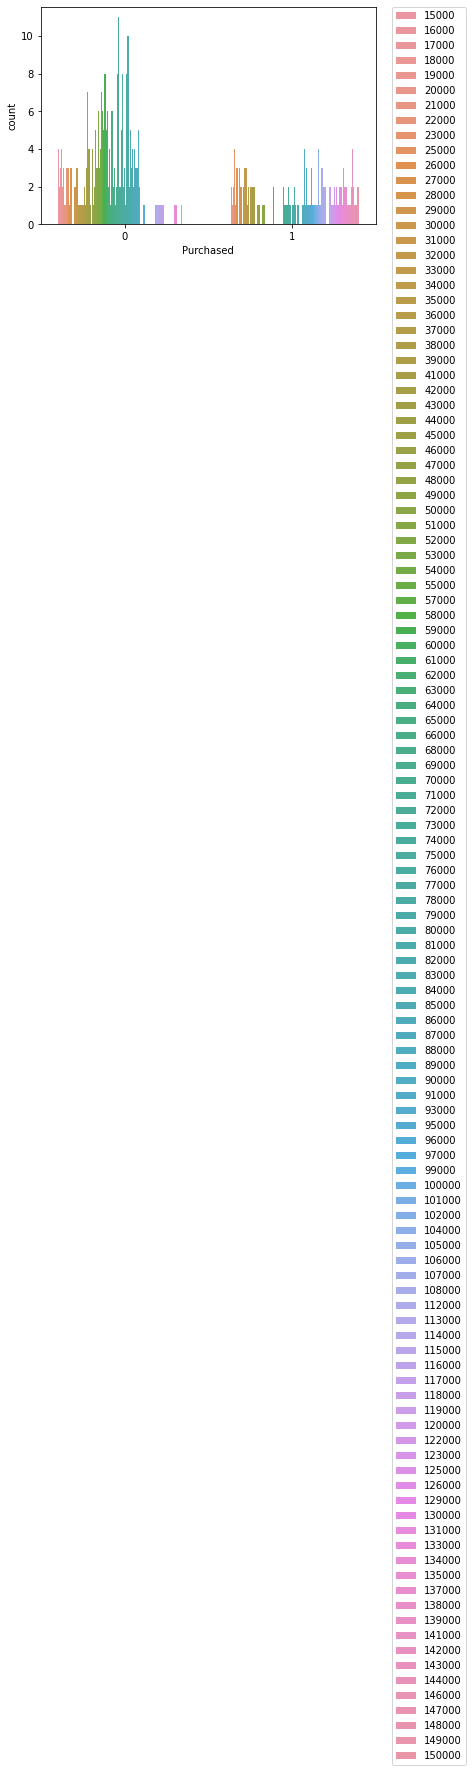

In [13]:
sb.countplot(x='Purchased',hue='EstimatedSalary',data = mydata)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Analysis of Estimated Salary Attribute using Histogram

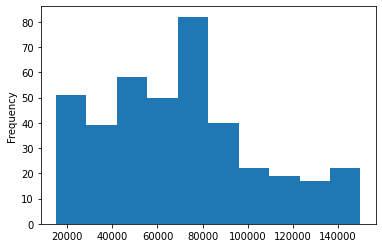

In [48]:
data['EstimatedSalary'].plot.hist()

Analysis of Age Attribute using Histogram

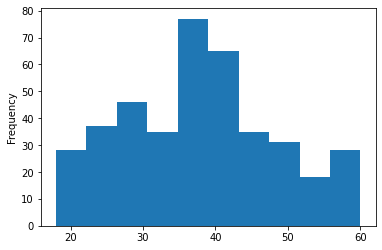

In [49]:
data['Age'].plot.hist()

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


Estimated Salary vs Age Box Plot

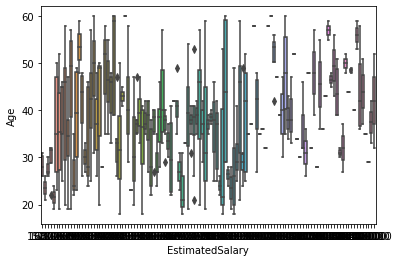

In [51]:
sb.boxplot(x='EstimatedSalary',y='Age',data = mydata)
plt.rcParams['figure.figsize'] = (25.0, 15.0)

Data Wrangling or Data Cleaning

Check for null values 

In [52]:
mydata.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


Sum up total missing or null values : 

In [53]:
mydata.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

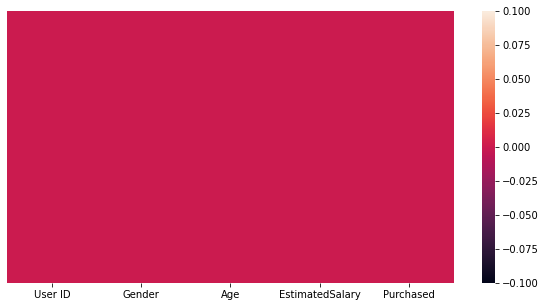

In [57]:
plt.rcParams['figure.figsize']= (10.0, 5.0)
sb.heatmap(mydata.isnull(), yticklabels=False)

Our DataSet does not contain any null values as we can conclude from above result.

Therefore, we will now change attributes with Strings to Categorical Value

Changing Gender to Categorical Value

In [58]:
gender = pd.get_dummies(data['Gender'],drop_first=True)
gender.head(6)

,Male
0,1
1,1
2,0
3,0
4,1
5,1


Concate the Male Column

In [64]:
newdata = pd.concat([data,gender],axis=1)
newdata.head(6)

,User ID,Gender,Age,EstimatedSalary,Purchased,Male
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1
5,15728773,Male,27,58000,0,1


Remove the irrelevant columns using drop. 

In [65]:
newdata = newdata.drop(columns=['User ID','Gender'])
newdata.head(6)

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
5,27,58000,0,1


Training and Testing

Import and Split the Dataset

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

x = newdata.drop('Purchased',axis=1)
y = newdata['Purchased']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)


Train and Predicting Model

In [67]:
model = LogisticRegression()
model.fit(x_train,y_train)
predict = model.predict(x_test)

Classification Report, Confusion Matrix And Accuracy Repot

In [68]:
print('Classification Report')
print(classification_report(y_test, predict))
print('Confusion Matrix')
print(confusion_matrix(y_test, predict))
print('\n Accuracy Report')
print(accuracy_score(y_test, predict))

Classification Report
              precision    recall  f1-score   support

           0       0.60      1.00      0.75        72
           1       0.00      0.00      0.00        48

    accuracy                           0.60       120
   macro avg       0.30      0.50      0.37       120
weighted avg       0.36      0.60      0.45       120

Confusion Matrix
[[72  0]
 [48  0]]

 Accuracy Report
0.6


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
